## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [1]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [2]:
# Cells for you to work and document as necessary - 
# definitely feel free to add more cells as you need

In [3]:
train_data.shape

(84534, 10)

In [4]:
train_data.isnull().sum()

ID           0
Promotion    0
purchase     0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
dtype: int64

# Step 1:

My initial step will be to analyze the invariant metric by comparing the number of participants in the control group versus the experiment group (i.e., those who received a promotional offer versus those who did not).

Hypothesis:
$$H_{0}: Exp_{particiapants} - Control_{participants} = 0$$
$$H_{a}: Exp_{participants} - Control_{participants} > 0$$
$$\alpha = 0.05$$


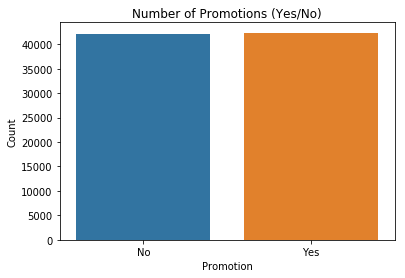

Count of who received promotion: 42364 and Who did not received it: 42170.


In [5]:
# Cheking the number of individual in each group
sns.countplot(data=train_data, x='Promotion')
plt.title('Number of Promotions (Yes/No)')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()


print("Count of who received promotion: {} and Who did not received it: {}.".format((train_data.Promotion == "Yes").sum(),(train_data.Promotion == "No").sum()))

In [6]:
# Calculating a measurable statistic in the difference of our group sizes
Promotion_avg = ((train_data.Promotion == "Yes").sum())/train_data.shape[0]
Non_Promotion_avg = (train_data.Promotion == "No").sum()/train_data.shape[0]
sample_difference = Promotion_avg - Non_Promotion_avg

print(f"Promotion Avg: {Promotion_avg.round(3)}")
print(f"Non-Promotion Avg: {Non_Promotion_avg.round(3)}")
print(f"Sample Difference: {sample_difference.round(3)}")


Promotion Avg: 0.501
Non-Promotion Avg: 0.499
Sample Difference: 0.002


In [7]:
#Bootstrapping the differences to create a distribution model under the null hypothesis.

differences = []
for _ in range(10000):
    bootsamp = train_data.sample(30000, replace=True)
    Promotion_avg = ((bootsamp.Promotion == "Yes").sum())/bootsamp.shape[0]
    Non_Promotion_avg = (bootsamp.Promotion == "No").sum()/bootsamp.shape[0]
    differences.append(Promotion_avg - Non_Promotion_avg)

In [8]:
bootsamp.shape[0]

30000

In [9]:
differences

[0.0023999999999999577,
 -0.0048666666666666303,
 6.6666666666659324e-05,
 0.0049333333333332896,
 0.0034000000000000141,
 0.0036000000000000476,
 0.0096666666666667123,
 -0.0032000000000000361,
 0.0018000000000000238,
 -0.0026666666666666505,
 0.0033333333333333548,
 -0.00013333333333331865,
 0.0061999999999999833,
 0.0081333333333333258,
 0.0085333333333332817,
 0.0047333333333333116,
 0.0056666666666667087,
 -0.0014000000000000123,
 0.0031333333333333768,
 0.0025333333333333319,
 0.0025999999999999912,
 0.0016000000000000458,
 0.0025333333333333319,
 0.0038000000000000256,
 0.0020000000000000018,
 -0.0062666666666666426,
 -0.0023999999999999577,
 0.007266666666666699,
 -0.007466666666666677,
 -0.00033333333333329662,
 0.00086666666666662673,
 -0.0018000000000000238,
 0.011600000000000055,
 0.0049333333333332896,
 0.00073333333333330808,
 0.0049333333333332896,
 -0.0012000000000000344,
 0.005733333333333368,
 0.0054000000000000159,
 0.0051333333333333786,
 -0.00066666666666664876,
 -

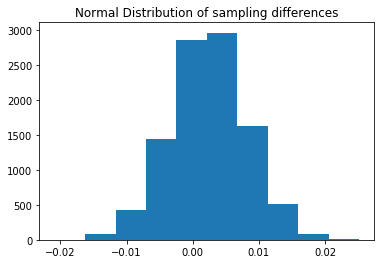

In [10]:
# Visualistion of our distribution 
plt.hist(differences)
plt.title('Normal Distribution of sampling differences');

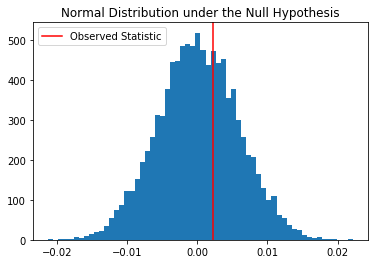

In [11]:
# distribution of our null hypothesis
null_vals = np.random.normal(0, np.std(differences), 10000)
plt.hist(null_vals, bins=60)
plt.axvline(sample_difference, color='r', label ="Observed Statistic")
plt.legend(loc='upper left')
plt.title("Normal Distribution under the Null Hypothesis");

In [12]:
sample_difference

0.0022949345825348799

In [13]:
p_vals = (sample_difference>null_vals).mean()

p_vals

0.64359999999999995

### Step  1. Conclusion 
Our P value is well within our confidence interval and therefore we **fail to reject the null hypothesis**. This implies that there is no statistical signifigance in the difference of our sampling populations. Awesome! Now, lets move forward with the analysis :) 

### Step 2. Analyzing the Impact on NIR

In this section, we will assess whether the experiment had a positive impact on the Net Incremental Revenue (NIR) metric.

Hypothesis:
$$H_{0}:Net Incremental Revenue = 0$$
$$H_{a}:Net Incremental Revenue > 0$$
$$\alpha = 0.05$$
Our *Alpha value* with the Bonferroni Correction:
$$Bonferroni Correction = \frac{\alpha}{number-of-measures} = 0.025$$

Where: 

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

In [14]:
# Finding our observed statistic 
purchase_trt = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
customer_trt = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
NIR = (10*purchase_trt - 0.15*customer_trt)-10*purchase_control
NIR


-2334.5999999999995

In [15]:
# Bootstraping our differences to get a model of the distribution for our null
NIRs = []
for _ in range(10000):
    bootsample = train_data.sample(30000, replace=True)
    purchase_treatment = bootsample[bootsample['Promotion'] == "Yes"].purchase.sum()
    customer_treatment = bootsample[bootsample['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample[bootsample['Promotion'] == "No"].purchase.sum()
    NIRs.append((10*purchase_treatment - 0.15*customer_treatment)-10*purchase_control)

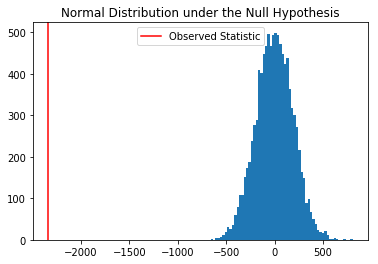

In [16]:
# Plotting under the null 
plt.axvline(NIR, color='r', label ="Observed Statistic")
null_NIRs = np.random.normal(0, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

In [17]:
# Checking the signifigane is 0
pval = (NIR>null_NIRs).mean()
pval

0.0

In [18]:
# Curious check to ensure all the data under the null lies above our observed statistic
pval2 = (NIR<null_NIRs).mean()
pval2

1.0

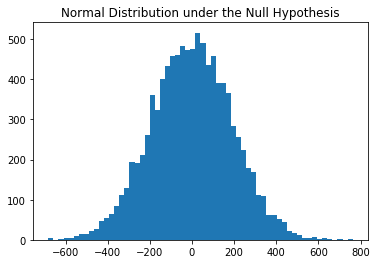

In [19]:
# distribution of our null hypothesis
null_NIRs = np.random.normal(0, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis");

### Step 2 Conclusion 
Our P value is well below our confidence interval and therefore we **fail to reject our null hypothesis**. This implies that there is no statistical signifigant increase in NIR (what we want to optimise). However, our data indicates we signifigantly REDUCED the NIR with this campaign. Not what we want...

### Step 3. Analyzing IIR Effect
Below we shall determine if the experiment had a positive effect on the IIR metric. 
Hypothesis:
$$H_{0}:Incremental Response Rate = 0$$
$$H_{a}:Incremental Response Rate > 0$$
$$\alpha = 0.025$$

Where:
$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$

In [20]:
# Finding our observed statistic 
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
customer_treatment = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
customer_control = train_data[train_data['Promotion'] == "No"].shape[0]
IRR = purchase_treatment/customer_treatment - purchase_control/customer_control
IRR

0.0094545478197727018

In [21]:
# Bootstraping our differences to get a model of the distribution for our null
IRRs = []
for _ in range(10000):
    bootsample2 = train_data.sample(30000, replace=True)
    purchase_treatment = bootsample2[bootsample2['Promotion'] == "Yes"].purchase.sum()
    customer_treatment = bootsample2[bootsample2['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample2[bootsample2['Promotion'] == "No"].purchase.sum()
    customer_control = bootsample2[bootsample2['Promotion'] == "No"].shape[0]
    IRR_boot = purchase_treatment/customer_treatment - purchase_control/customer_control
    IRRs.append(IRR_boot)

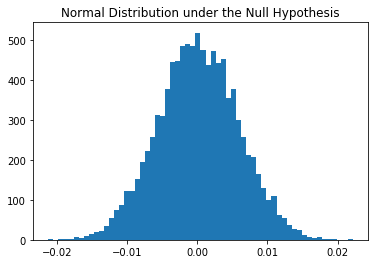

In [22]:
# distribution of our null hypothesis
null_IRRs = np.random.normal(0, np.std(IRRs), 10000)
plt.hist(null_vals, bins=60)
plt.title("Normal Distribution under the Null Hypothesis");

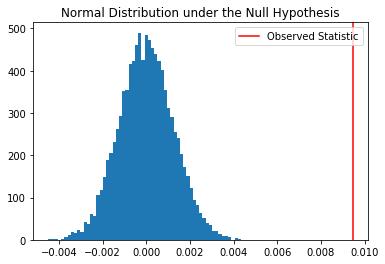

In [23]:
# Reviewing our observed statistic against the bootstrapped sample
plt.axvline(IRR, color='r', label ="Observed Statistic")
null_IRRs = np.random.normal(0, np.std(IRRs), 10000)
plt.hist(null_IRRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

In [24]:
# Calculating the signifigance of this result 
pval_IRR = (IRR>null_IRRs).mean()
pval_IRR

1.0

#### Step 3. Conclusion
Our p-value is significantly above the threshold of our null distribution, leading us to **reject the null hypothesis**. This indicates that there is a statistically significant increase in the Incremental Response Rate (IRR) between our control and experimental groups. Thus, our analysis suggests that the campaign positively impacts the number of customers who purchased the product when they received the promotion, compared to those who did not.

#### Step 4. Model Creation
In this section, we will develop a model that accurately predicts whether a customer will respond to the campaign.

In [27]:
slice_df = train_data.iloc[:,2:]

slice_df.head()

,purchase,V1,V2,V3,V4,V5,V6,V7
0,0,2,30.443518,-1.165083,1,1,3,2
1,0,3,32.159350,-0.645617,2,3,2,2
2,0,2,30.431659,0.133583,1,1,4,2
3,0,0,26.588914,-0.212728,2,1,4,2
4,0,3,28.044332,-0.385883,1,1,2,2


In [28]:
train_data.groupby('Promotion').purchase.sum()

Promotion
No     319
Yes    721
Name: purchase, dtype: int64

In [29]:
# Split data into predictors and target variables
X = slice_df.drop(['purchase'],axis=1)
y = slice_df.purchase

In [32]:
# Scaling our inputs 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [34]:
# Instantiating our model and fitting it

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
# Loading in our test data 
test_data = pd.read_csv('Test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [38]:
# Tailoring the test data to test our model 
data_exp_test = train_data.copy()
data_exp_test = data_exp_test[data_exp_test['Promotion']=="Yes"]
data_exp_test.drop(['ID','Promotion'], axis = 1, inplace=True)
X_test = data_exp_test.drop(['purchase'],axis=1)
y_test = data_exp_test.purchase

In [39]:
# Scaling our test input 
X_test = min_max_scaler.fit_transform(X_test)

In [40]:
# Predicting our target values
y_pred = clf.predict(X_test)

In [43]:
# Checking our accuracy for the model 
accuracy = (y_pred == y_test).mean()
print("accuracy {0:.5f}%".format(accuracy))

accuracy 0.98289%


In [53]:
promotion_yes_no = []
for value in y_pred:
    if value == 0:
        promotion_yes_no.append("No")
    if value == 1:
        promotion_yes_no.append("Yes")
    

In [54]:
# Converting to a NumPy Array 
np.asarray(promotion_yes_no)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], 
      dtype='<U3')

In [55]:

def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
   
    df = min_max_scaler.fit_transform(df)
    
    y_pred = clf.predict(df)
    
    promotion_yes_no = []
    for value in y_pred:
        if value == 0:
            promotion_yes_no.append("No")
        if value == 1:
            promotion_yes_no.append("Yes")
            
    promotion = np.asarray(promotion_yes_no)
    
    return promotion

df = train_data.iloc[:,3:]
promotion = promotion_strategy(df)

print(promotion)

['No' 'No' 'No' ..., 'No' 'No' 'No']


In [56]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0000.

Your nir with this strategy is -2.55.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.0, -2.5499999999999998)

Here’s a paraphrased version of the model conclusion:

---

### Model Conclusion

We achieved an improved IRR, but our NIR was notably worse compared to the benchmarks set by Udacity experts. Despite this, our approach proved significantly better than what was observed in our initial experiment.

The confusion matrix revealed that our accuracy was primarily affected by a few false negatives. Adopting a less conservative model could potentially increase the NIR by allowing more false positives, which might improve the NIR metric, albeit at the expense of the IRR.

To summarize:
- We trained our model exclusively on individuals who were offered the promotion in the experiment.
- The model was then used to predict whether these individuals would make a purchase based on the predictor variables.
- We evaluated the model’s NIR and IRR metrics using a local Python script.